In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = 'C:\\Users\\hakam\\UPN\\Bangkit\\Capstone\\Data\\Marine Species'

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 1711 images belonging to 2 classes.
Found 427 images belonging to 2 classes.


In [4]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=val_generator,)

Epoch 1/15


C:\UPN_Kuliah\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\UPN_Kuliah\Anaconda\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6923 - loss: 0.7347 - val_accuracy: 0.8525 - val_loss: 0.3381
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9320 - loss: 0.1756 - val_accuracy: 0.8806 - val_loss: 0.3284
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9698 - loss: 0.0922 - val_accuracy: 0.8525 - val_loss: 0.4024
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9779 - loss: 0.0716 - val_accuracy: 0.8712 - val_loss: 0.3957
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9889 - loss: 0.0417 - val_accuracy: 0.8314 - val_loss: 0.5248
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9761 - loss: 0.0496 - val_accuracy: 0.8548 - val_loss: 0.5471
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9853 - loss: 0.0411 - val_accuracy: 0.8806 - val_loss: 0.4691
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9869 - loss: 0.0335 - val_accuracy: 0.8431 - val_loss: 0.5495
Epo

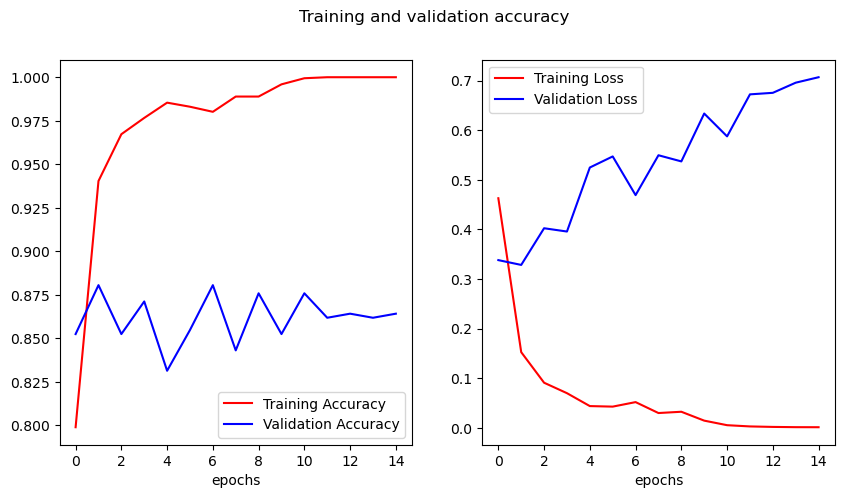

In [8]:
# Get training summary validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 5, 5, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,370,728 (12.86 MB)

 Trainable params: 370,914 (1.41 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 741,830 (2.83 MB)

In [10]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels Species.txt', 'w') as f:
    f.write(labels) 

{'danger': 0, 'safe': 1}


In [11]:
#save the model
saved_model_path = "safety.h5"

model.save(saved_model_path)